<a href="https://colab.research.google.com/github/joapen/ML-Learning-bucket/blob/main/marketbreadthdata_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

###  Project Definition  ###

PROJECT_ID = 'Looking for correlation between DIX, GEX and SPX'

FILEPATH = "/content/drive/MyDrive/public/DREAM/Amplitud-Mercado-2021-05-30.csv" 

used_features = ['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME']

TARGET_COLUMN = 'SPXCLOSE'

print("Setup Complete")

Setup Complete


In [ ]:
###   Load data + features    ###
df = pd.read_csv(FILEPATH)
df.set_index('DATE')

print("Setup Complete")

Setup Complete


Data ranges (From -> To)
* market breadth (1979-12-31 ->  )
* dix and  gex (2011-05-02 -> )
* VIX	(1990-01-02 -> )

# 1.- Exploratory Data Analysis (EDA)

**** First 5 lines of TRAIN data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME
0,1979-12-31,500,10395,362,3735,100,11,1761,7590,755,14740,756,11310,84,75,469,5480,107.940002,31530000
1,1980-01-02,250,8000,1016,12798,91,24,1363,7712,442,8220,1148,29610,61,36,325,2780,105.760002,40610000
2,1980-01-03,178,6414,1174,13307,56,55,1270,6259,455,15710,1143,29160,14,63,324,5610,105.220001,50480000
3,1980-01-04,815,14608,193,2299,52,11,1612,6573,1246,31870,296,4680,47,17,329,2580,106.519997,39130000
4,1980-01-07,546,11813,293,3132,78,11,1786,7975,914,26060,625,13640,90,10,370,4800,106.809998,44500000


**** Info() data of the TRAIN data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              10440 non-null  object 
 1   ADVNASDAQ         10440 non-null  int64  
 2   ADVNASDAQVOLUMEN  10440 non-null  int64  
 3   DESNASDAQ         10440 non-null  int64  
 4   DESNASDAQVOLUMEN  10440 non-null  int64  
 5   NASDAQMAX         10440 non-null  int64  
 6   NASDAQMIN         10440 non-null  int64  
 7   NASDAQREP         10440 non-null  int64  
 8   NASDAQREPVOLUMEN  10440 non-null  int64  
 9   ADVNYSE           10440 non-null  int64  
 10  ADVNYSEVOLUMEN    10440 non-null  int64  
 11  DESNYSE           10440 non-null  int64  
 12  DESNYSEVOLUMEN    10440 non-null  int64  
 13  NYSEMAX           10440 non-null  int64  
 14  NYSEMIN           10440 non-null  int64  
 15  NYSEREP           10440 non-null  int64  
 16  

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


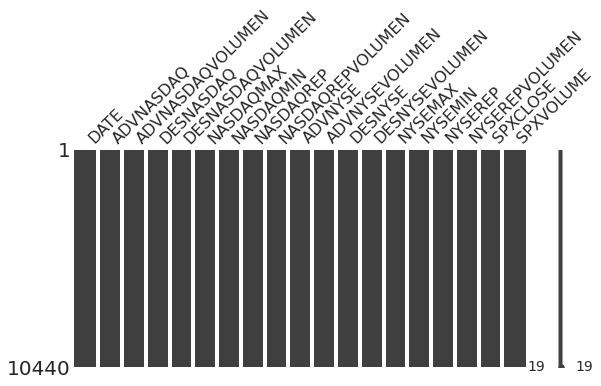

In [ ]:
####        Optional     ######

###  Display basic data for TRAINING dataset ###

print("**** First 5 lines of TRAIN data:")
display(df.head(5))
print("**** Info() data of the TRAIN data set:")
display(df.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': df.isnull().sum(),
                                 'missing_values (%)': round(df.isnull().sum() * 100 / len(df),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(df, figsize=(8, 4));

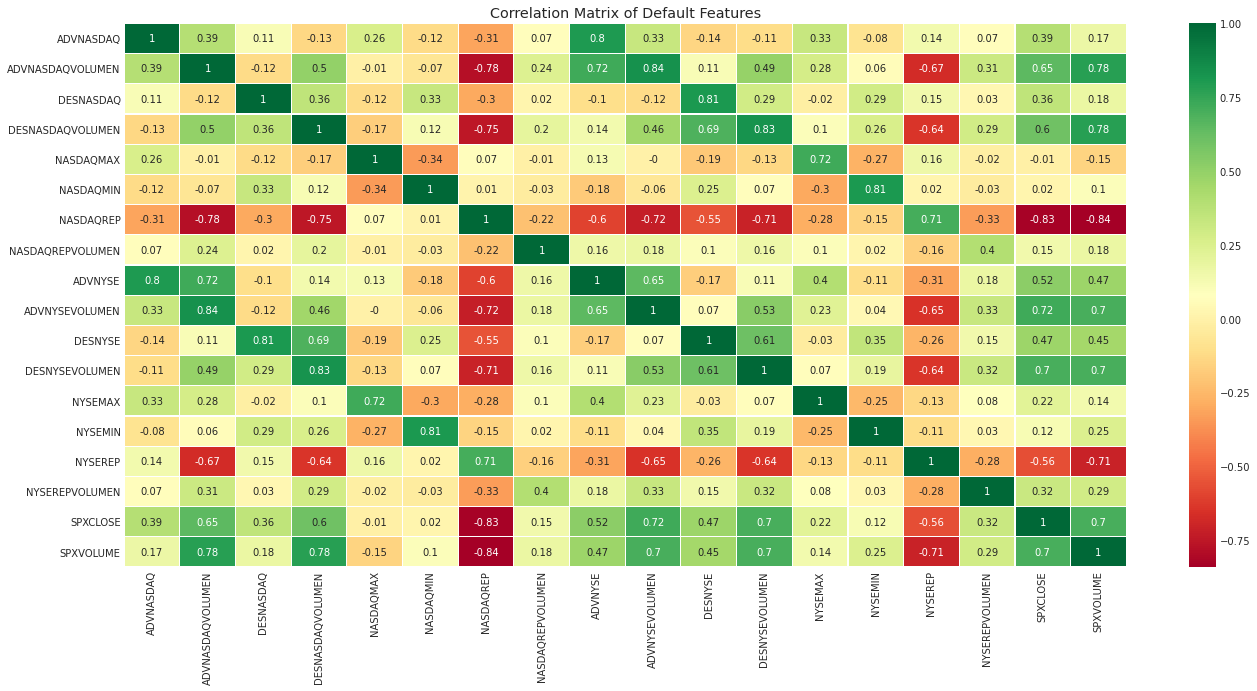

In [ ]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMap
fig, ax = pltHeatMap.subplots(figsize=(20, 10))
corr = df.corr().round(2)
sns.heatmap(corr, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features')
del corr

### Relative changes on data
Let's make a new dataframe with the percentage changes

In [ ]:
###    mandatory   ###
pct_change_df = pd.DataFrame(data=df.DATE)
pct_change_df.set_index('DATE')

for featureX in used_features:
  pct_change_df[featureX + 'DailyReturn'] = df[featureX].pct_change()

pct_change_df.dropna()
pct_change_df.describe()

,ADVNASDAQDailyReturn,ADVNASDAQVOLUMENDailyReturn,DESNASDAQDailyReturn,DESNASDAQVOLUMENDailyReturn,NASDAQMAXDailyReturn,NASDAQMINDailyReturn,NASDAQREPDailyReturn,NASDAQREPVOLUMENDailyReturn,ADVNYSEDailyReturn,ADVNYSEVOLUMENDailyReturn,DESNYSEDailyReturn,DESNYSEVOLUMENDailyReturn,NYSEMAXDailyReturn,NYSEMINDailyReturn,NYSEREPDailyReturn,NYSEREPVOLUMENDailyReturn,SPXCLOSEDailyReturn,SPXVOLUMEDailyReturn
count,10439.000000,10439.000000,10439.000000,10439.000000,1.043700e+04,10439.000000,10439.000000,10439.000000,10439.000000,10439.000000,10439.000000,10439.000000,1.043500e+04,1.043000e+04,10439.000000,10439.000000,10439.000000,10439.000000
mean,0.108272,0.581861,0.081972,0.338087,inf,0.097831,0.007890,0.573207,0.154943,0.649215,0.121363,0.468852,inf,inf,0.017869,0.518077,0.000415,0.021814
std,0.882527,28.734146,0.471324,8.924732,NaN,0.670659,0.138770,18.141818,1.166978,19.930191,0.614567,14.944862,NaN,NaN,0.221656,9.199306,0.011297,0.334169
min,-0.956853,-0.993081,-0.971212,-0.993539,-1.000000e+00,-0.946499,-3.106383,-0.997326,-0.954683,-0.982386,-0.926684,-0.986127,-1.000000e+00,-1.000000e+00,-0.977778,-0.997865,-0.204669,-0.960321
25%,-0.192880,-0.294712,-0.186217,-0.300744,-1.923077e-01,-0.200000,-0.043103,-0.221748,-0.237598,-0.339790,-0.240955,-0.338067,-2.360497e-01,-2.608696e-01,-0.072097,-0.263037,-0.004496,-0.089538
50%,-0.009251,-0.011896,0.008547,0.017788,2.000000e-02,0.000000,0.001190,0.010400,-0.015683,-0.017397,0.014401,0.011642,2.469136e-02,0.000000e+00,0.002618,0.000974,0.000581,0.000403
75%,0.225065,0.399275,0.240202,0.453639,2.727273e-01,0.270270,0.047487,0.275610,0.290734,0.494709,0.326205,0.536949,3.422238e-01,3.951958e-01,0.081589,0.365031,0.005700,0.103214
max,64.176471,2924.026072,11.368421,846.436895,inf,37.600000,1.625000,1804.752097,72.615385,1985.134261,9.238739,1518.460444,inf,inf,7.333333,848.711365,0.115800,26.519680


# 2.- Split data in train / test

In [ ]:
### mandatory ==> split data based on a date  ####
split_date ="2020-01-02"

### Volume of data
Training = 10.089 Testing = 351

In [ ]:
# Code for execution vía 1) raw data

train_data = df.loc[df['DATE'] <= split_date]
test_data = df.loc[df['DATE'] > split_date]

# Filter rows with missing values
train_data = train_data.dropna(axis=0)
#test_data = test_data.dropna(axis=0)

description = pd.Series(['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME'])
# Choose target and features
train_y = train_data.SPXCLOSE
val_y = test_data.SPXCLOSE

train_X = train_data[used_features]
val_X = test_data[used_features]

In [ ]:
# Code for execution vía 2) relative data (% change approach)

used_features_pct = ['ADVNASDAQDailyReturn',
                 'ADVNASDAQVOLUMENDailyReturn',
                 'DESNASDAQDailyReturn',
                 'DESNASDAQVOLUMENDailyReturn',
                 'NASDAQMAXDailyReturn',
                 'NASDAQMINDailyReturn',
                 'NASDAQREPDailyReturn',
                 'NASDAQREPVOLUMENDailyReturn',
                 'ADVNYSEDailyReturn',
                 'ADVNYSEVOLUMENDailyReturn',
                 'DESNYSEDailyReturn',
                 'DESNYSEVOLUMENDailyReturn',
                 'NYSEMAXDailyReturn',
                 'NYSEMINDailyReturn',
                 'NYSEREPDailyReturn',
                 'NYSEREPVOLUMENDailyReturn',
                 'SPXCLOSEDailyReturn',
                 'SPXVOLUMEDailyReturn']


pct_train_data = pct_change_df.loc[pct_change_df['DATE'] <= split_date]
pct_test_data = pct_change_df.loc[pct_change_df['DATE'] > split_date]

pct_train_data = pct_train_data.dropna(axis=0)

# Choose target and features
train_y = pct_train_data.SPXCLOSEDailyReturn
val_y = pct_test_data.SPXCLOSEDailyReturn

train_X = pct_train_data[used_features_pct]
val_X = pct_test_data[used_features_pct]

print('completed')

completed


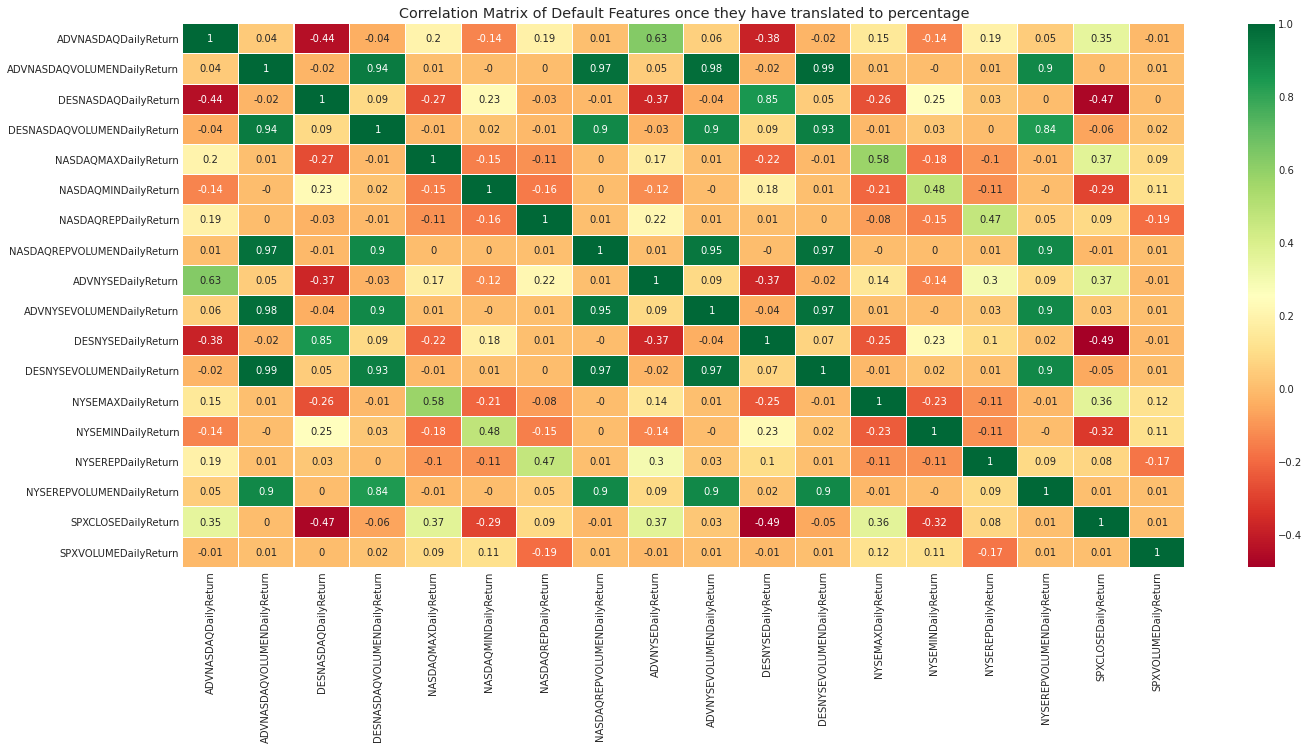

In [ ]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMapPct
fig, ax = pltHeatMapPct.subplots(figsize=(20, 10))
corr_pct = pct_change_df.corr().round(2)
sns.heatmap(corr_pct, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features once they have translated to percentage')
del corr_pct

# 5.- Classification and model
In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

In [ ]:
from xgboost import XGBRegressor

model_1 = XGBRegressor(n_estimators=100, learning_rate=0.05)
model_2 = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_4 = XGBRegressor(n_estimators=2000, learning_rate=0.05)
model_5 = XGBRegressor(n_estimators=3000, learning_rate=0.05)
model_6 = XGBRegressor(n_estimators=100, learning_rate=0.1)
model_7 = XGBRegressor(n_estimators=500, learning_rate=0.1)
model_8 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_9 = XGBRegressor(n_estimators=2000, learning_rate=0.1)
model_10 = XGBRegressor(n_estimators=3000, learning_rate=0.1)

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

# Add silent=True to avoid printing out updates with each cycle
print ("Models completed")

Models completed


Let's run each one of the models and check its mean absolute error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)


for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %4f" % (i+1, mae))

[09:59:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 1 MAE: 0.003032
[09:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 2 MAE: 0.000374
[09:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 3 MAE: 0.000374
[09:59:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 4 MAE: 0.000374
[09:59:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 5 MAE: 0.000374
[09:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 6 MAE: 0.000385
[09:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor 

Now I check the Mean Aboslute Error of the 10 run models and I pick the best one (lower MAE)

In [ ]:
# make predictions using the model we think it's better
predictions = model_1.predict(val_X)

#from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

print("\nModel Accuracy: %4f" % model_3.score(val_X, predictions))

Mean Absolute Error : 0.003032123439182629

Model Accuracy: 0.967568


## 5.1.- Check the results

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(test_data.DATE), y=list(pct_test_data.SPXCLOSEDailyReturn)))

fig.add_trace(
    go.Scatter(x=list(test_data.DATE), y=list(predictions)))

# Set title
fig.update_layout(
    title_text="Actual SPX % change (per day) data Vs. prediction (% change per day)"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
        autorange=True,
        linecolor="#673ab7",
        mirror=True,
        showline=True,
        type="linear"
    )

)

fig.show()

## 5.2.- Analysis of the results

In [ ]:
# Add SPXCLOSE data from test to compare absolute values

test_data['ActualAbsoluteReturn'] = test_data.SPXCLOSE + (test_data.SPXCLOSE * pct_test_data.SPXCLOSEDailyReturn)
test_data['PredictedAbsoluteReturn'] = test_data.SPXCLOSE + (test_data.SPXCLOSE * predictions)

print('complete')

complete


In [ ]:
import plotly.graph_objects as go2

# Create figure
fig2 = go2.Figure()

fig2.add_trace(
    go2.Scatter(x=list(test_data.DATE), y=list(test_data.ActualAbsoluteReturn)))

fig2.add_trace(
    go2.Scatter(x=list(test_data.DATE), y=list(test_data.PredictedAbsoluteReturn)))

# Set title
fig2.update_layout(
    title_text="Actual SPX data Vs. prediction"
)

# Add range slider
fig2.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
        autorange=True,
        linecolor="#673ab7",
        mirror=True,
        showline=True,
        type="linear"
    )

)

fig2.show()
#pltResults_pct.savefig("results.png")
print('completed')

completed


In [ ]:
###   Optional   ###
# Output as file, so it can be drawn better

output = pd.DataFrame({'DATE': test_data.DATE, 'SPXCLOSEActualDailyReturn' : test_data.SPXCLOSEDailyReturn, 'SPXCLOSEDailyReturn': predictions})
output.to_csv('output.csv', index=False)
print("Your file is saved!")

Your file is saved!


# 6.- Let's check the performance of the prediction: TP, FP, TN, FN

In [ ]:
# Start reviewing the difference between actual value and prediction
dif = pct_test_data.SPXCLOSEDailyReturn - predictions
print(dif.describe())

count    351.000000
mean      -0.002872
std        0.001883
min       -0.031693
25%       -0.003060
50%       -0.002928
75%       -0.002783
max        0.006208
Name: SPXCLOSEDailyReturn, dtype: float64


In [ ]:
# Let's check the table of results
TP = 0   # true positive
FP = 0   # False positive
TN = 0   # True negative
FN = 0   # False negative
accurateTP = 0 # accurate True Positive
accurateTN = 0 # accurate True Negative
totalRes = len(predictions)

# I use the mean to define the threshold (this needs to be reviewed)
threshold = -0.002872

resultT = pd.DataFrame(pct_test_data.SPXCLOSEDailyReturn)
resultT["pred"] = predictions
resultT["dif"] = dif

arrRes = resultT.to_numpy()

for x in arrRes:
    if (x[0]>0 and x[1]>0):
        TP += 1
        if x[2]<threshold:
            accurateTP +=1
    if (x[0]<0 and x[1]>0):
        FP += 1
    if (x[0]<0 and x[1]<0):
        TN += 1
        if x[2]<threshold:
            accurateTN +=1
    if (x[0]>0 and x[1]<0):
        FN += 1

pTP = (TP/totalRes) * 100
pAccurateTP = (accurateTP/totalRes) *100
pFP = (FP/totalRes) * 100
pTN = (TN/totalRes) * 100
pAccurateTN = (accurateTN/totalRes) *100
pFN = (FN/totalRes) * 100

print("Total = " +str(TP+FP+TN+FN))
print("\nTP = " + str(TP) + "( %2f" % pTP + " )")
print("FP = " + str(FP) + "( %2f" % pFP + " )")
print("TN = " + str(TN) + "( %2f" % pTN + " )")
print("FN = " + str(FN) + "( %2f" % pFP + " )")

print("\nright guess = " + str(TP + TN) + "( %2f" % (pTP+pTN) + " )")
print("error = " + str(FP + FN) + "( %2f" % (pFP+pFN) + " )")
print("\nAccurate TP = " + str(accurateTP) + "( %2f" % pAccurateTP + " )")
print("Accurate TN = " + str(accurateTN) + "( %2f" % pAccurateTN + " )")

Total = 351

TP = 197( 56.125356 )
FP = 40( 11.396011 )
TN = 114( 32.478632 )
FN = 0( 11.396011 )

right guess = 311( 88.603989 )
error = 40( 11.396011 )

Accurate TP = 72( 20.512821 )
Accurate TN = 101( 28.774929 )
